In [1]:
%matplotlib inline


# Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)


In [16]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

### Step 1. Download the dataset
- Download the data
- Find the number of samples, number of features, number of classes

In [ ]:
# Download the data, if not already on disk and load it as numpy arrays
labeled_faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [11]:
print(type(labeled_faces))
print(len(labeled_faces))
print(labeled_faces.target_names)
print(labeled_faces.images.shape)

<class 'sklearn.utils._bunch.Bunch'>
5
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


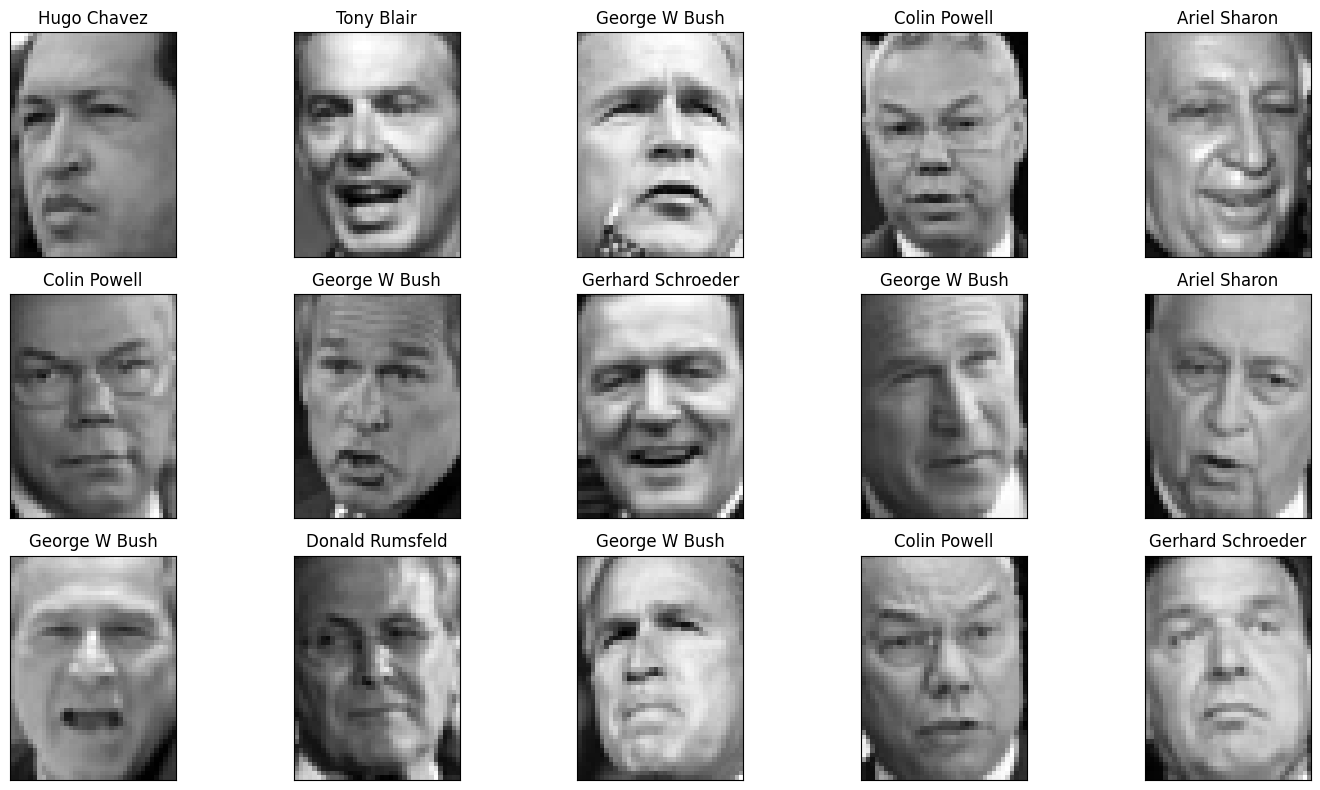

In [8]:
fig, ax = plt.subplots(3, 5, figsize=(15, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(labeled_faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_title(labeled_faces.target_names[labeled_faces.target[i]])
plt.tight_layout()

### Step 2. Train the Model
- Split the data into test and train datasets
- Compute a PCA (eigenfaces) on the face dataset
- Train an SVM Model
- Create a confusion matrix to evaluate the model.

In [13]:
X = labeled_faces.images.reshape(len(labeled_faces.images), -1)
y = labeled_faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
pca = PCA(n_components=150, whiten=True, random_state=42)

In [18]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred, target_names=labeled_faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.55      0.71        11
     Colin Powell       0.80      0.85      0.82        47
  Donald Rumsfeld       0.93      0.59      0.72        22
    George W Bush       0.75      0.97      0.85       119
Gerhard Schroeder       0.91      0.53      0.67        19
      Hugo Chavez       1.00      0.31      0.47        13
       Tony Blair       0.84      0.59      0.70        27

         accuracy                           0.79       258
        macro avg       0.89      0.63      0.71       258
     weighted avg       0.82      0.79      0.78       258



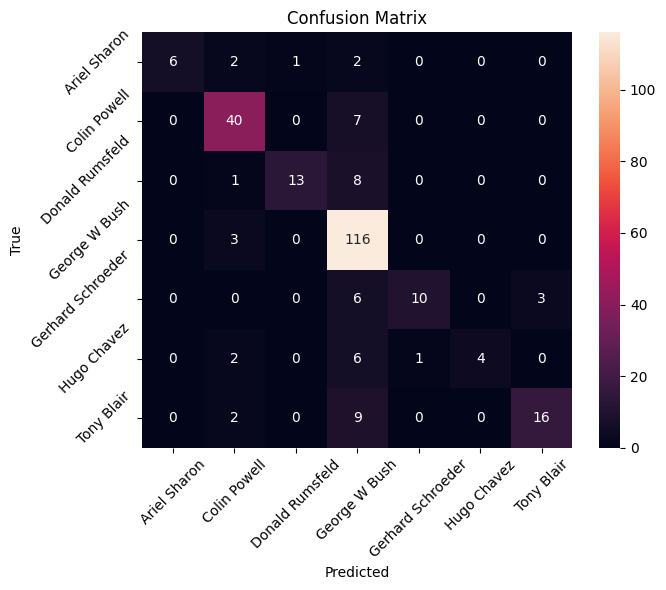

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d',
    xticklabels=labeled_faces.target_names,
    yticklabels=labeled_faces.target_names
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()